# Import Packages

In [1]:
import json
import gzip
import pandas as pd
import datetime
!pip install transformers
from transformers import pipeline
from google.colab import drive
drive.mount('/content/drive')
import numpy as np

Mounted at /content/drive


In [ ]:
!pip install matplotlib-venn

In [2]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns
from textblob import TextBlob

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#Load Data

###Transform the data to easy-to-access format

In [ ]:
# load user reviews data for beauty category
file = '/content/drive/MyDrive/CS 229 Group Project/Data/All_Beauty.jsonl.gz'

data_list = []

with gzip.open(file, 'rt', encoding='utf-8') as fp:
    for line in fp:
        data = json.loads(line.strip())
        data_list.append(data)

Beauty_User_df = pd.DataFrame(data_list)

In [ ]:
csv_file_path = '/content/drive/MyDrive/CS 229 Group Project/Data/Final/Beauty_User_Reviews.csv'
Beauty_User_df.to_csv(csv_file_path, index=False)

In [ ]:
# load user reviews data for fashion category
file = '/content/drive/MyDrive/CS 229 Group Project/Data/Amazon_Fashion.jsonl.gz'

data_list = []

with gzip.open(file, 'rt', encoding='utf-8') as fp:
    for line in fp:
        data = json.loads(line.strip())
        data_list.append(data)

Fashion_User_df = pd.DataFrame(data_list)

In [ ]:
csv_file_path = '/content/drive/MyDrive/CS 229 Group Project/Data/Final/Fashion_User_Reviews.csv'
Fashion_User_df.to_csv(csv_file_path, index=False)

In [ ]:
# load meta data for these 2 cateogories
file = '/content/drive/MyDrive/CS 229 Group Project/Data/meta_All_Beauty.jsonl.gz'

data_list = []

with gzip.open(file, 'rt', encoding='utf-8') as fp:
    for line in fp:
        data = json.loads(line.strip())
        data_list.append(data)

Meta_Beauty_df = pd.DataFrame(data_list)

In [ ]:
csv_file_path = '/content/drive/MyDrive/CS 229 Group Project/Data/Final/Meta_Beauty_df.csv'
Meta_Beauty_df.to_csv(csv_file_path, index=False)

In [ ]:
# load meta data for these 2 cateogories
file = '/content/drive/MyDrive/CS 229 Group Project/Data/meta_Amazon_Fashion.jsonl.gz'

data_list = []

with gzip.open(file, 'rt', encoding='utf-8') as fp:
    for line in fp:
        data = json.loads(line.strip())
        data_list.append(data)

Meta_Fashion_df = pd.DataFrame(data_list)

In [ ]:
csv_file_path = '/content/drive/MyDrive/CS 229 Group Project/Data/Final/Meta_Fashion_df.csv'
Meta_Fashion_df.to_csv(csv_file_path, index=False)

###Read csv data

In [8]:
csv_file_path = '/content/drive/MyDrive/CS 229 Group Project/Data/Final/Beauty_User_Reviews.csv'
Beauty_User_df =pd.read_csv(csv_file_path)

In [5]:
csv_file_path = '/content/drive/MyDrive/CS 229 Group Project/Data/Final/Fashion_User_Reviews.csv'
Fashion_User_df =pd.read_csv(csv_file_path)

In [6]:
csv_file_path = '/content/drive/MyDrive/CS 229 Group Project/Data/Final/Meta_Beauty_df.csv'
Meta_Beauty_df =pd.read_csv(csv_file_path)

In [7]:
csv_file_path = '/content/drive/MyDrive/CS 229 Group Project/Data/Final/Meta_Fashion_df.csv'
Meta_Fashion_df =pd.read_csv(csv_file_path)

# EDA

In [9]:
Beauty_User_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701528 entries, 0 to 701527
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             701528 non-null  float64
 1   title              701368 non-null  object 
 2   text               701316 non-null  object 
 3   images             701528 non-null  object 
 4   asin               701528 non-null  object 
 5   parent_asin        701528 non-null  object 
 6   user_id            701528 non-null  object 
 7   timestamp          701528 non-null  int64  
 8   helpful_vote       701528 non-null  int64  
 9   verified_purchase  701528 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 48.8+ MB


In [10]:
Fashion_User_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500939 entries, 0 to 2500938
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   rating             float64
 1   title              object 
 2   text               object 
 3   images             object 
 4   asin               object 
 5   parent_asin        object 
 6   user_id            object 
 7   timestamp          int64  
 8   helpful_vote       int64  
 9   verified_purchase  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 174.1+ MB


In [ ]:
Meta_Beauty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112590 entries, 0 to 112589
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   main_category    112590 non-null  object 
 1   title            112578 non-null  object 
 2   average_rating   112590 non-null  float64
 3   rating_number    112590 non-null  int64  
 4   features         112590 non-null  object 
 5   description      112590 non-null  object 
 6   price            17704 non-null   float64
 7   images           112590 non-null  object 
 8   videos           112590 non-null  object 
 9   store            101246 non-null  object 
 10  categories       112590 non-null  object 
 11  details          112590 non-null  object 
 12  parent_asin      112590 non-null  object 
 13  bought_together  0 non-null       float64
dtypes: float64(3), int64(1), object(10)
memory usage: 12.0+ MB


In [ ]:
Meta_Fashion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826108 entries, 0 to 826107
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   main_category    826108 non-null  object 
 1   title            826046 non-null  object 
 2   average_rating   826108 non-null  float64
 3   rating_number    826108 non-null  int64  
 4   features         826108 non-null  object 
 5   description      826108 non-null  object 
 6   price            50249 non-null   float64
 7   images           826108 non-null  object 
 8   videos           826108 non-null  object 
 9   store            799213 non-null  object 
 10  categories       826108 non-null  object 
 11  details          826108 non-null  object 
 12  parent_asin      826108 non-null  object 
 13  bought_together  0 non-null       float64
dtypes: float64(3), int64(1), object(10)
memory usage: 88.2+ MB


### Visualization

##### illustrate why we picked these 2 categories

In [ ]:
# check user overlap between fashion and beauty categories
print(len(set(Beauty_User_df['user_id']).intersection(set(Fashion_User_df['user_id']))))

116428


In [17]:
beauty_users = set(Beauty_User_df['user_id'])
fashion_users = set(Fashion_User_df['user_id'])

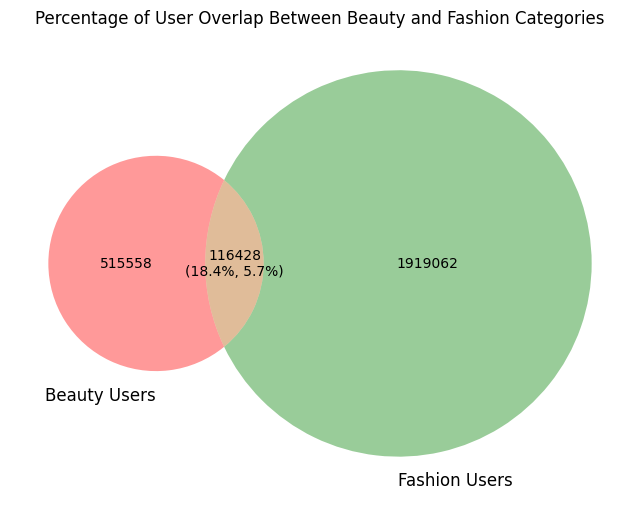

In [ ]:
# Calculate the intersections and unique counts
total_beauty = len(beauty_users)
total_fashion = len(fashion_users)
overlap = len(beauty_users.intersection(fashion_users))

percent_beauty = (overlap / total_beauty) * 100
percent_fashion = (overlap / total_fashion) * 100

# Create the Venn diagram with percentages in labels
plt.figure(figsize=(8, 8))
venn_diagram = venn2([beauty_users, fashion_users], ('Beauty Users', 'Fashion Users'))
venn_diagram.get_label_by_id('11').set_text(f'{overlap}\n({percent_beauty:.1f}%, {percent_fashion:.1f}%)')

plt.title('Percentage of User Overlap Between Beauty and Fashion Categories')
plt.show()

##### check if verified purchase necessarily associated with rating

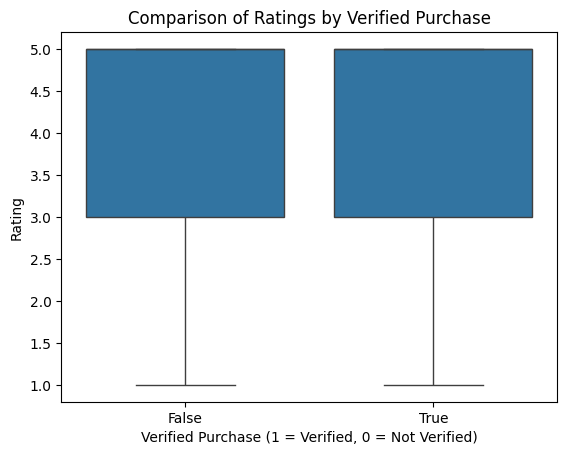

In [13]:
sns.boxplot(x='verified_purchase', y='rating', data=Fashion_User_df)
plt.title('Comparison of Ratings by Verified Purchase')
plt.xlabel('Verified Purchase (1 = Verified, 0 = Not Verified)')
plt.ylabel('Rating')
plt.show()

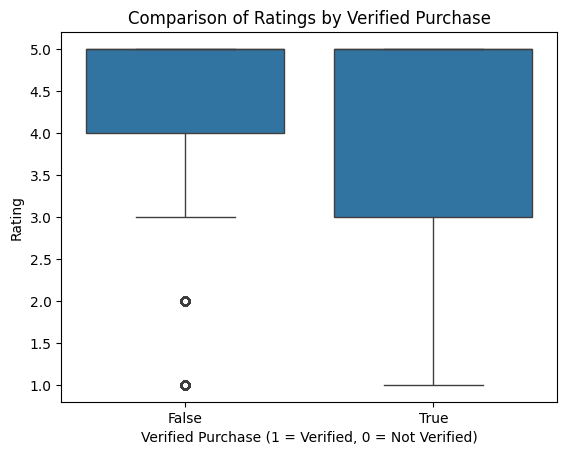

In [15]:
sns.boxplot(x='verified_purchase', y='rating', data=Beauty_User_df)
plt.title('Comparison of Ratings by Verified Purchase')
plt.xlabel('Verified Purchase (1 = Verified, 0 = Not Verified)')
plt.ylabel('Rating')
plt.show()

In [14]:
# Check if there are ratings where verified_purchase is 0
non_verified_ratings = Fashion_User_df[Fashion_User_df['verified_purchase'] == 0]['rating']

print("Number of ratings with non-verified purchase:", non_verified_ratings.count())
print("Average rating for non-verified purchases:", non_verified_ratings.mean())

# It's also useful to see if any non-verified purchases lack ratings
has_rating_when_non_verified = non_verified_ratings.notna().sum()
print("Number of non-verified purchases with ratings:", has_rating_when_non_verified)


Number of ratings with non-verified purchase: 163237
Average rating for non-verified purchases: 3.957227834375785
Number of non-verified purchases with ratings: 163237


# Data Processing

##### Focus on overlapping users only

In [18]:
overlapping_users = beauty_users.intersection(fashion_users)

Overlapping_User_Fashion_df = Fashion_User_df[Fashion_User_df['user_id'].isin(overlapping_users)]
Overlapping_User_Beauty_df = Beauty_User_df[Beauty_User_df['user_id'].isin(overlapping_users)]

In [19]:
# check if there are duplicates
# Dropping duplicates based on 'user_id', 'asin', and "rating", 'text' columns
unique_rows_fashion = Overlapping_User_Fashion_df.drop_duplicates(subset=['user_id', 'asin', 'rating','text'], keep='first')
unique_rows_beauty = Overlapping_User_Beauty_df.drop_duplicates(subset=['user_id', 'asin', 'rating','text'], keep='first')

In [20]:
dropped_fashion = len(Overlapping_User_Fashion_df) - len(unique_rows_fashion)
dropped_beauty = len(Overlapping_User_Beauty_df) - len(unique_rows_beauty)

print(f"Number of data points dropped in Fashion: {dropped_fashion}")
print(f"Number of data points dropped in Beauty: {dropped_beauty}")

print(f"Number of unique data points in Fashion: {len(unique_rows_fashion)}")
print(f"Number of unique data points in Beauty: {len(unique_rows_beauty)}")

Number of data points dropped in Fashion: 1429
Number of data points dropped in Beauty: 1033
Number of unique data points in Fashion: 208582
Number of unique data points in Beauty: 147417


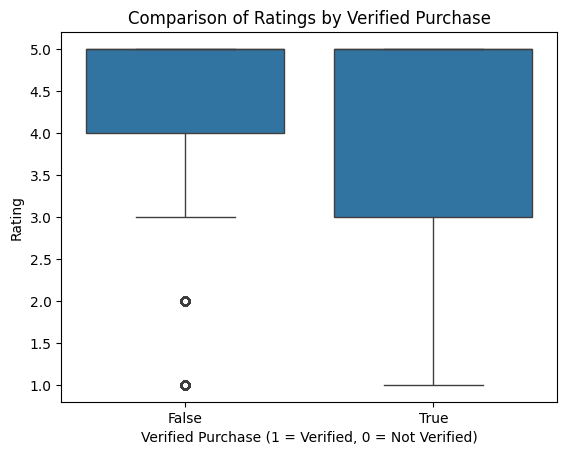

In [21]:
sns.boxplot(x='verified_purchase', y='rating', data=unique_rows_fashion)
plt.title('Comparison of Ratings by Verified Purchase')
plt.xlabel('Verified Purchase (1 = Verified, 0 = Not Verified)')
plt.ylabel('Rating')
plt.show()

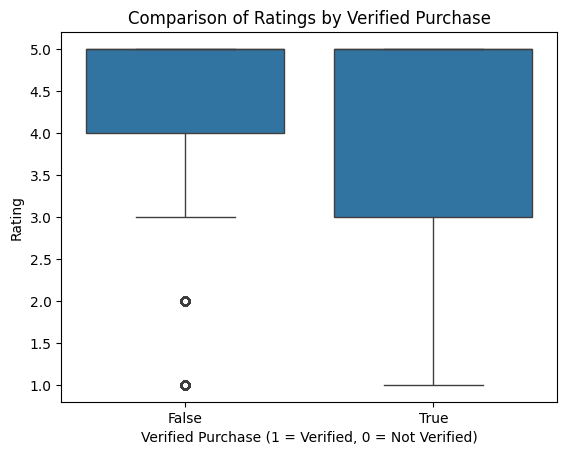

In [22]:
sns.boxplot(x='verified_purchase', y='rating', data=unique_rows_beauty)
plt.title('Comparison of Ratings by Verified Purchase')
plt.xlabel('Verified Purchase (1 = Verified, 0 = Not Verified)')
plt.ylabel('Rating')
plt.show()

##### Slice User Review Data (focus on users with >= 10 review only)



In [23]:
# fashion
fashion_user_review_counts = unique_rows_fashion.groupby('user_id').size()
fashion_users_with_10_reviews = fashion_user_review_counts[fashion_user_review_counts > 1].index
fashion_users_with_10_reviews_df = unique_rows_fashion[unique_rows_fashion['user_id'].isin(fashion_users_with_10_reviews)]

In [24]:
# beauty
beauty_user_review_counts = unique_rows_beauty.groupby('user_id').size()
beauty_users_with_10_reviews = beauty_user_review_counts[beauty_user_review_counts > 1].index
beauty_users_with_10_reviews_df = unique_rows_beauty[unique_rows_beauty['user_id'].isin(beauty_users_with_10_reviews)]

In [25]:
fashion_users_with_10_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129807 entries, 12 to 2499068
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             129807 non-null  float64
 1   title              129791 non-null  object 
 2   text               129770 non-null  object 
 3   images             129807 non-null  object 
 4   asin               129807 non-null  object 
 5   parent_asin        129807 non-null  object 
 6   user_id            129807 non-null  object 
 7   timestamp          129807 non-null  int64  
 8   helpful_vote       129807 non-null  int64  
 9   verified_purchase  129807 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 10.0+ MB


In [26]:
beauty_users_with_10_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47935 entries, 3 to 701392
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rating             47935 non-null  float64
 1   title              47926 non-null  object 
 2   text               47922 non-null  object 
 3   images             47935 non-null  object 
 4   asin               47935 non-null  object 
 5   parent_asin        47935 non-null  object 
 6   user_id            47935 non-null  object 
 7   timestamp          47935 non-null  int64  
 8   helpful_vote       47935 non-null  int64  
 9   verified_purchase  47935 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 3.7+ MB


<ipython-input-27-f69875a0ce1f>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fashion_users_with_10_reviews_df['rating'], shade=True, label='Fashion')
<ipython-input-27-f69875a0ce1f>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(beauty_users_with_10_reviews_df['rating'], shade=True, label='Beauty')


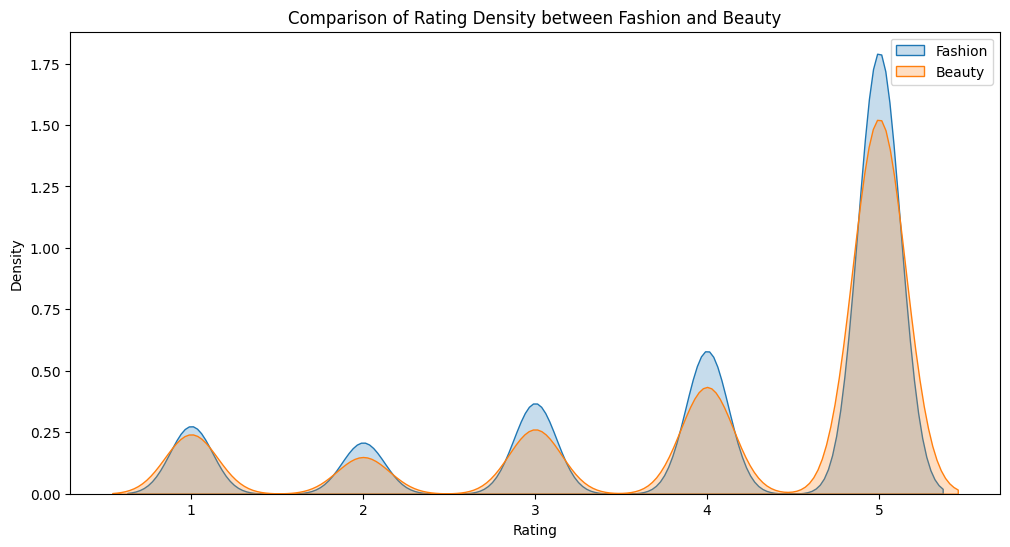

In [27]:
plt.figure(figsize=(12, 6))
sns.kdeplot(fashion_users_with_10_reviews_df['rating'], shade=True, label='Fashion')
sns.kdeplot(beauty_users_with_10_reviews_df['rating'], shade=True, label='Beauty')
plt.title('Comparison of Rating Density between Fashion and Beauty')
plt.xlabel('Rating')
plt.legend()
plt.show()

- Show user rating behaviors in both categories are similar

# Feature Engineering

##### NLP Processing for consumer review data- Sentiment Score

In [28]:
def add_sentiment_scores(df):
    df['text'] = df['text'].astype(str)
    df['title'] = df['title'].astype(str)
    # TextBlob sentiment analysis
    df['sentiment_text'] = df['text'].apply(lambda text: TextBlob(text).sentiment.polarity)
    df['sentiment_title'] = df['title'].apply(lambda text: TextBlob(text).sentiment.polarity)
    return df

In [29]:
fashion_users_with_10_reviews_df = add_sentiment_scores(fashion_users_with_10_reviews_df)
beauty_users_with_10_reviews_df = add_sentiment_scores(beauty_users_with_10_reviews_df)

<ipython-input-28-6a0aeec4c55b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].astype(str)
<ipython-input-28-6a0aeec4c55b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title'] = df['title'].astype(str)
<ipython-input-28-6a0aeec4c55b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

##### Feature Engineering - avg rating per user

In [30]:
average_ratings_fashion = fashion_users_with_10_reviews_df.groupby('user_id')['rating'].mean().reset_index()
average_ratings_fashion.rename(columns={'rating': 'user_average_rating'}, inplace=True)
fashion_user_df = pd.merge(fashion_users_with_10_reviews_df, average_ratings_fashion, on='user_id', how='left')

In [31]:
average_ratings_beauty = beauty_users_with_10_reviews_df.groupby('user_id')['rating'].mean().reset_index()
average_ratings_beauty.rename(columns={'rating': 'user_average_rating'}, inplace=True)
beauty_user_df = pd.merge(beauty_users_with_10_reviews_df, average_ratings_beauty, on='user_id', how='left')

##### Feature Engineering - Standard Deviation of Ratings

In [32]:
std_ratings_fashion = fashion_user_df.groupby('user_id')['rating'].std().reset_index()

std_ratings_fashion.rename(columns={'rating': 'user_std_rating'}, inplace=True)
std_ratings_fashion['user_std_rating'].fillna(0, inplace=True)

fashion_user_df = pd.merge(fashion_user_df, std_ratings_fashion, on='user_id', how='left')

<ipython-input-32-ee492aef1d52>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  std_ratings_fashion['user_std_rating'].fillna(0, inplace=True)


In [33]:
std_ratings_beauty = beauty_user_df.groupby('user_id')['rating'].std().reset_index()

std_ratings_beauty.rename(columns={'rating': 'user_std_rating'}, inplace=True)
std_ratings_beauty['user_std_rating'].fillna(0, inplace=True)

beauty_user_df = pd.merge(beauty_user_df, std_ratings_beauty, on='user_id', how='left')

<ipython-input-33-81e28ae80c7d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  std_ratings_beauty['user_std_rating'].fillna(0, inplace=True)


##### Feature Engineering - Avg title sentiment scores per user

In [34]:
average_sentiment_title_fashion = fashion_user_df.groupby('user_id')['sentiment_title'].mean().reset_index()
average_sentiment_title_fashion.rename(columns={'sentiment_title': 'avg_user_sentiment_title'}, inplace=True)

fashion_user_df = pd.merge(fashion_user_df, average_sentiment_title_fashion, on='user_id', how='left')

In [35]:
average_sentiment_title_beauty = beauty_user_df.groupby('user_id')['sentiment_title'].mean().reset_index()
average_sentiment_title_beauty.rename(columns={'sentiment_title': 'avg_user_sentiment_title'}, inplace=True)

beauty_user_df = pd.merge(beauty_user_df, average_sentiment_title_beauty, on='user_id', how='left')

##### Feature Engineering - Avg title sentiment scores per user

In [36]:
average_sentiment_text_fashion = fashion_user_df.groupby('user_id')['sentiment_text'].mean().reset_index()
average_sentiment_text_fashion.rename(columns={'sentiment_text': 'avg_user_sentiment_text'}, inplace=True)

fashion_user_df = pd.merge(fashion_user_df, average_sentiment_text_fashion, on='user_id', how='left')

In [37]:
average_sentiment_text_beauty = beauty_user_df.groupby('user_id')['sentiment_text'].mean().reset_index()
average_sentiment_text_beauty.rename(columns={'sentiment_text': 'avg_user_sentiment_text'}, inplace=True)

beauty_user_df = pd.merge(beauty_user_df, average_sentiment_text_beauty, on='user_id', how='left')

##### Feature Engineering - Review Count: Count the number of reviews posted by each user as a measure of engagement.

In [38]:
review_counts_fashion = fashion_user_df.groupby('user_id').size().reset_index(name='user_review_count')

fashion_user_df = pd.merge(fashion_user_df, review_counts_fashion, on='user_id', how='left')

In [39]:
review_counts_beauty = beauty_user_df.groupby('user_id').size().reset_index(name='user_review_count')

beauty_user_df = pd.merge(beauty_user_df, review_counts_beauty, on='user_id', how='left')

##### Feature Engineering - Avg review word count: Average number of words per review, indicating how expressive or detailed the user is

In [40]:
fashion_user_df['word_count'] = fashion_user_df['text'].apply(lambda x: len(str(x).split()))

average_word_count_fashion = fashion_user_df.groupby('user_id')['word_count'].mean().reset_index()
average_word_count_fashion.rename(columns={'word_count': 'user_avg_word_count'}, inplace=True)

fashion_user_df = pd.merge(fashion_user_df, average_word_count_fashion, on='user_id', how='left')

In [41]:
beauty_user_df['word_count'] = beauty_user_df['text'].apply(lambda x: len(str(x).split()))

average_word_count_beauty = beauty_user_df.groupby('user_id')['word_count'].mean().reset_index()
average_word_count_beauty.rename(columns={'word_count': 'user_avg_word_count'}, inplace=True)

beauty_user_df = pd.merge(beauty_user_df, average_word_count_beauty, on='user_id', how='left')

Feature Engineering - Helpfulness Ratio: Ratio of helpful votes to total reviews, to capture how valuable others find the user's reviews

In [42]:
total_helpful_votes_fashion = fashion_user_df.groupby('user_id')['helpful_vote'].sum().reset_index()
total_reviews_fashion = fashion_user_df.groupby('user_id').size().reset_index(name='total_reviews')

helpfulness_data_fashion = pd.merge(total_helpful_votes_fashion, total_reviews_fashion, on='user_id')
helpfulness_data_fashion['helpfulness_ratio'] = helpfulness_data_fashion['helpful_vote'] / helpfulness_data_fashion['total_reviews']

fashion_user_df = pd.merge(fashion_user_df, helpfulness_data_fashion[['user_id', 'helpfulness_ratio']], on='user_id', how='left')

In [43]:
total_helpful_votes_beauty = beauty_user_df.groupby('user_id')['helpful_vote'].sum().reset_index()
total_reviews_beauty = beauty_user_df.groupby('user_id').size().reset_index(name='total_reviews')

helpfulness_data_beauty = pd.merge(total_helpful_votes_beauty, total_reviews_beauty, on='user_id')
helpfulness_data_beauty['helpfulness_ratio'] = helpfulness_data_beauty['helpful_vote'] / helpfulness_data_beauty['total_reviews']

beauty_user_df = pd.merge(beauty_user_df, helpfulness_data_beauty[['user_id', 'helpfulness_ratio']], on='user_id', how='left')

Feature Engineering- Verified Purchases Count: Number of verified purchases, which might indicate a higher trust or authenticity in reviews

In [44]:
verified_purchases_fashion = fashion_user_df[fashion_user_df['verified_purchase'] == True]

verified_counts_fashion = verified_purchases_fashion.groupby('user_id').size().reset_index(name='verified_purchase_count')

fashion_user_df = pd.merge(fashion_user_df, verified_counts_fashion, on='user_id', how='left')

# Fill NaN values with 0 where no verified purchases exist
fashion_user_df['verified_purchase_count'].fillna(0, inplace=True)

<ipython-input-44-74f6bc4eec8a>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fashion_user_df['verified_purchase_count'].fillna(0, inplace=True)


In [45]:
verified_purchases_beauty = beauty_user_df[beauty_user_df['verified_purchase'] == True]

verified_counts_beauty = verified_purchases_beauty.groupby('user_id').size().reset_index(name='verified_purchase_count')

beauty_user_df = pd.merge(beauty_user_df, verified_counts_beauty, on='user_id', how='left')

# Fill NaN values with 0 where no verified purchases exist
beauty_user_df['verified_purchase_count'].fillna(0, inplace=True)

<ipython-input-45-da14b8b8eb4d>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  beauty_user_df['verified_purchase_count'].fillna(0, inplace=True)


##### Feature Engineering-Review date

In [46]:
fashion_user_df['timestamp'] = pd.to_datetime(fashion_user_df['timestamp'], unit='ms')
fashion_user_df['review_year'] = fashion_user_df['timestamp'].dt.year
fashion_user_df['review_month'] = fashion_user_df['timestamp'].dt.month
fashion_user_df['review_day'] = fashion_user_df['timestamp'].dt.day

In [47]:
beauty_user_df['timestamp'] = pd.to_datetime(beauty_user_df['timestamp'], unit='ms')
beauty_user_df['review_year'] = beauty_user_df['timestamp'].dt.year
beauty_user_df['review_month'] = beauty_user_df['timestamp'].dt.month
beauty_user_df['review_day'] = beauty_user_df['timestamp'].dt.day

In [48]:
# get the mode of year, month, day for each unique user
def get_mode(x):
    return x.mode()[0] if not x.mode().empty else None

In [49]:
fashion_user_modes = fashion_user_df.groupby('user_id').agg({
    'review_year': get_mode,
    'review_month': get_mode,
    'review_day': get_mode
}).reset_index()
fashion_user_modes.rename(columns={'review_year': 'review_year_mode'}, inplace=True)
fashion_user_modes.rename(columns={'review_month': 'review_month_mode'}, inplace=True)
fashion_user_modes.rename(columns={'review_day': 'review_year_day'}, inplace=True)
fashion_user_df = pd.merge(fashion_user_df, fashion_user_modes, on='user_id', how='left')

In [50]:
beauty_user_modes = beauty_user_df.groupby('user_id').agg({
    'review_year': get_mode,
    'review_month': get_mode,
    'review_day': get_mode
}).reset_index()
beauty_user_modes.rename(columns={'review_year': 'review_year_mode'}, inplace=True)
beauty_user_modes.rename(columns={'review_month': 'review_month_mode'}, inplace=True)
beauty_user_modes.rename(columns={'review_day': 'review_year_day'}, inplace=True)
beauty_user_df = pd.merge(beauty_user_df, beauty_user_modes, on='user_id', how='left')

##### Drop features we don't use

In [53]:
# save dataset
fashion_user_df.to_csv('/content/drive/MyDrive/CS 229 Group Project/Data/Updated/fashion_user_df.csv', index=False)
beauty_user_df.to_csv('/content/drive/MyDrive/CS 229 Group Project/Data/Updated/beauty_user_df.csv', index=False)

In [54]:
fashion_user_df = pd.read_csv('/content/drive/MyDrive/CS 229 Group Project/Data/Updated/fashion_user_df.csv')
beauty_user_df = pd.read_csv('/content/drive/MyDrive/CS 229 Group Project/Data/Updated/beauty_user_df.csv')

In [55]:
fashion_user_df.columns

Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase', 'sentiment_text',
       'sentiment_title', 'user_average_rating', 'user_std_rating',
       'avg_user_sentiment_title', 'avg_user_sentiment_text',
       'user_review_count', 'word_count', 'user_avg_word_count',
       'helpfulness_ratio', 'verified_purchase_count', 'review_year',
       'review_month', 'review_day', 'review_year_mode', 'review_month_mode',
       'review_year_day'],
      dtype='object')

In [56]:
fashion_user_df.drop(columns=['review_year_day','review_month_mode','verified_purchase_count','review_year_mode','user_avg_word_count','word_count','parent_asin','rating','title', 'text','images','asin','timestamp','helpful_vote', 'verified_purchase', 'sentiment_text', 'sentiment_title', 'review_year', 'review_month', 'review_day'], inplace=True)
beauty_user_df.drop(columns=['review_year_day','review_month_mode','verified_purchase_count','review_year_mode','user_avg_word_count','word_count','parent_asin','rating','title', 'text','images','asin','timestamp','helpful_vote', 'verified_purchase', 'sentiment_text', 'sentiment_title', 'review_year', 'review_month', 'review_day'], inplace=True)

In [57]:
# drop duplicated user_id
fashion_user_df = fashion_user_df.drop_duplicates(subset='user_id')
beauty_user_df = beauty_user_df.drop_duplicates(subset='user_id')

##### check if users in categories show similar behavior (check if distributions aross 2 datasets are similar)

In [58]:
print("Fashion Dataset Statistics:")
print(fashion_user_df.describe())

print("\nBeauty Dataset Statistics:")
print(beauty_user_df.describe())

Fashion Dataset Statistics:
       user_average_rating  user_std_rating  avg_user_sentiment_title  \
count         37653.000000     37653.000000              37653.000000   
mean              4.031610         0.868981                  0.281068   
std               0.965275         0.839594                  0.260202   
min               1.000000         0.000000                 -1.000000   
25%               3.500000         0.000000                  0.077083   
50%               4.250000         0.707107                  0.272917   
75%               5.000000         1.414214                  0.458333   
max               5.000000         2.828427                  1.000000   

       avg_user_sentiment_text  user_review_count  helpfulness_ratio  
count             37653.000000       37653.000000       37653.000000  
mean                  0.290943           3.447454           0.720539  
std                   0.206088           4.555859           2.573999  
min                  -0.987500

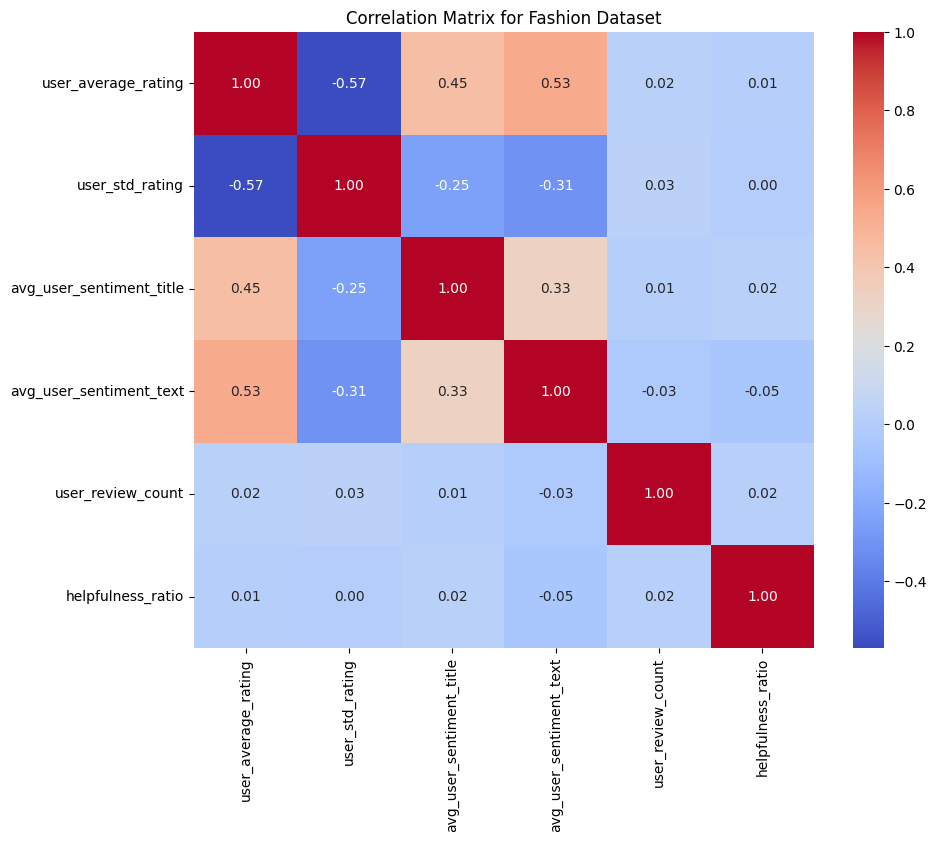

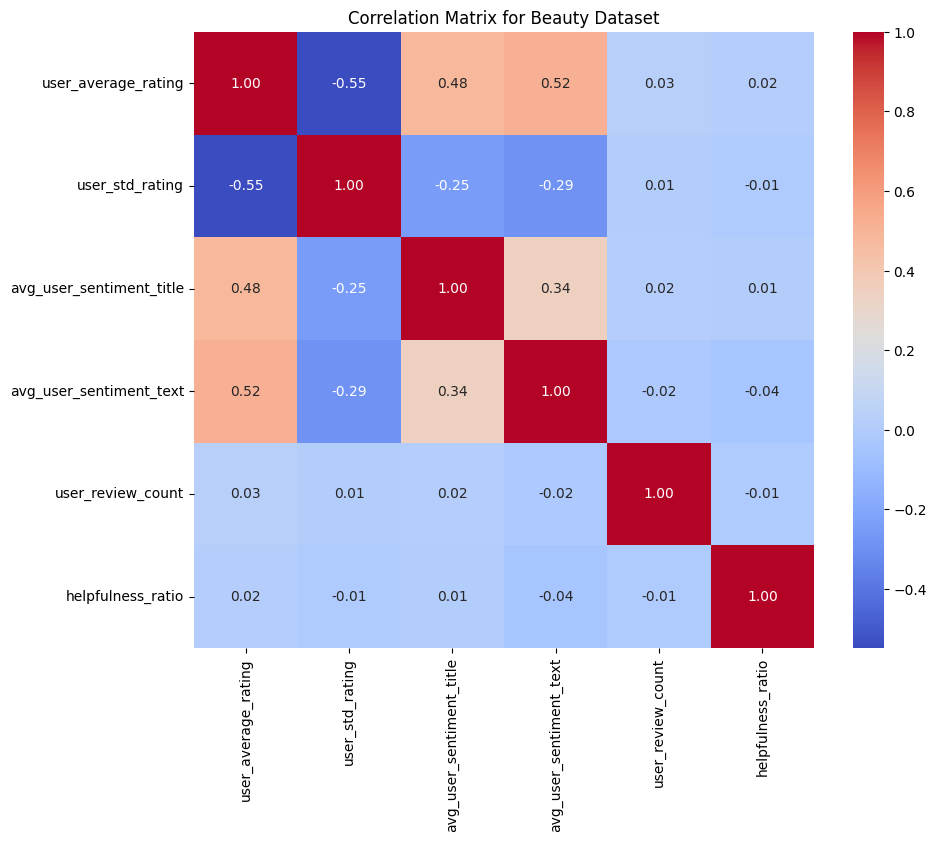

In [59]:
# correlation matrix
fashion_corr_data = fashion_user_df.drop('user_id', axis=1)
beauty_corr_data = beauty_user_df.drop('user_id', axis=1)
fashion_corr_matrix = fashion_corr_data.corr()
beauty_corr_matrix = beauty_corr_data.corr()

# Visualize the correlation matrix for the fashion dataset
plt.figure(figsize=(10, 8))
sns.heatmap(fashion_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Fashion Dataset')
plt.show()

# Visualize the correlation matrix for the beauty dataset
plt.figure(figsize=(10, 8))
sns.heatmap(beauty_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Beauty Dataset')
plt.show()

In [60]:
fashion_user_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37653 entries, 0 to 129805
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   37653 non-null  object 
 1   user_average_rating       37653 non-null  float64
 2   user_std_rating           37653 non-null  float64
 3   avg_user_sentiment_title  37653 non-null  float64
 4   avg_user_sentiment_text   37653 non-null  float64
 5   user_review_count         37653 non-null  int64  
 6   helpfulness_ratio         37653 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.3+ MB


In [61]:
difference = fashion_corr_matrix - beauty_corr_matrix
frobenius_norm = np.linalg.norm(difference, 'fro')
print("Frobenius Norm of the difference between the matrices:", frobenius_norm)

Frobenius Norm of the difference between the matrices: 0.09076130301198482


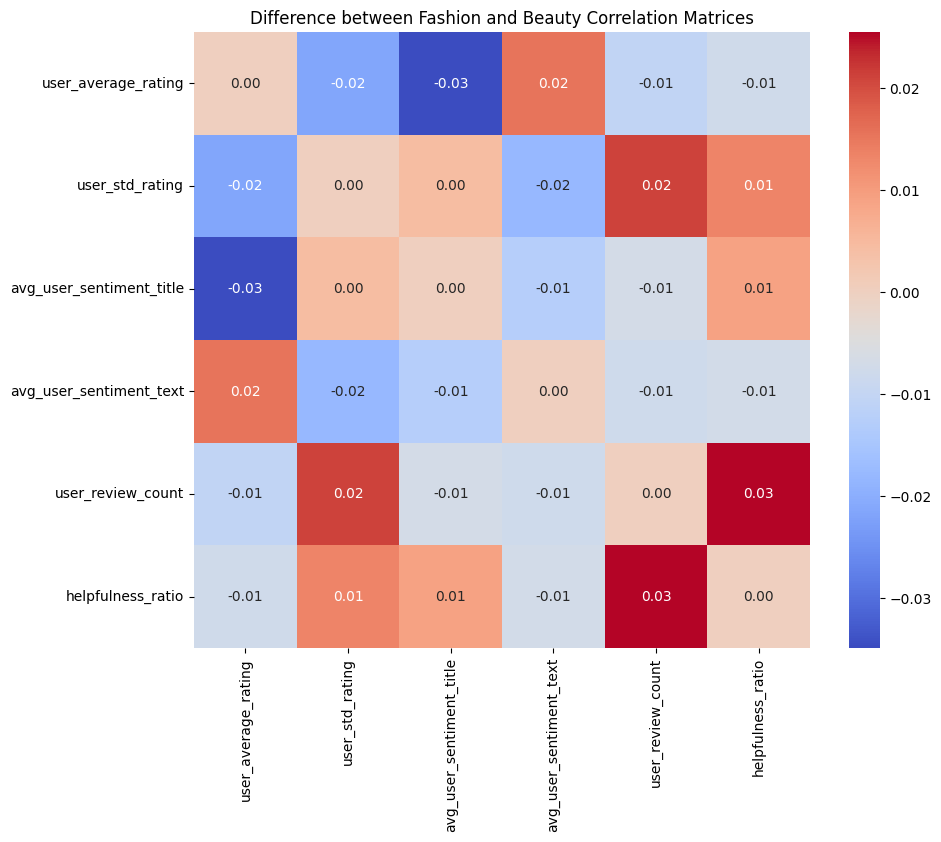

In [62]:
plt.figure(figsize=(10, 8))
sns.heatmap(difference, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Difference between Fashion and Beauty Correlation Matrices')
plt.show()

# Product Selection

In [63]:
# check product overlap between two categories
print(len(set(Meta_Beauty_df['parent_asin']).intersection(set(Meta_Fashion_df['parent_asin']))))

0


In [67]:
fashion_review_df = pd.read_csv('/content/drive/MyDrive/CS 229 Group Project/Data/Updated/fashion_user_df.csv')
beauty_review_df = pd.read_csv('/content/drive/MyDrive/CS 229 Group Project/Data/Updated/beauty_user_df.csv')

In [68]:
# get the most reviewed products in both categories
most_reviewed_fashion = Meta_Fashion_df.sort_values(by='rating_number', ascending=False).head(1000)
most_reviewed_beauty = Meta_Beauty_df.sort_values(by='rating_number', ascending=False).head(1000)

In [69]:
meta_fashion = most_reviewed_fashion
meta_beauty = most_reviewed_beauty

In [70]:
# check if any duplicates in parent_asin
print(len(meta_fashion['parent_asin'].unique()))
print(len(meta_beauty['parent_asin'].unique()))

1000
1000


### Feature Engineering

##### Product title length

In [71]:
meta_fashion['title_word_count'] = meta_fashion['title'].str.split().str.len()  # Number of words
meta_beauty['title_word_count'] = meta_beauty['title'].str.split().str.len()

##### Weighted Rating: combining average rating and the number of ratings (eweighted_rating = average_rating * log(rating_number))

In [72]:
meta_fashion['weighted_rating'] = meta_fashion['average_rating'] * np.log1p(meta_fashion['rating_number'])
meta_beauty['weighted_rating'] = meta_beauty['average_rating'] * np.log1p(meta_beauty['rating_number'])

##### Description sentiment score

In [73]:
meta_fashion['description_sentiment'] = meta_fashion['description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
meta_beauty['description_sentiment'] = meta_beauty['description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [74]:
# drop columns
meta_fashion.drop(columns=['description', 'price', 'bought_together', 'main_category', 'title', 'features', 'images', 'videos', 'store', 'categories', 'details'], inplace=True)
meta_beauty.drop(columns=['description', 'price', 'bought_together', 'main_category', 'title', 'features', 'images', 'videos', 'store', 'categories', 'details'], inplace=True)

# Prepare labels - user-product matrix with review rating being values

In [75]:
merged_df = pd.merge(fashion_review_df[['user_id', 'parent_asin', 'rating']],
                     meta_fashion[['parent_asin']],
                     on='parent_asin',
                     how='inner')
# Create the user-product matrix using parent_asin
user_fashion_product_matrix = merged_df.pivot_table(index='user_id', columns='parent_asin', values='rating', fill_value=0)
total_elements = user_fashion_product_matrix.size
non_zero_elements = user_fashion_product_matrix.astype(bool).sum().sum()  # Count non-zero entries
sparsity = (total_elements - non_zero_elements) / total_elements

print(f"Sparsity of the matrix: {sparsity:.4f} - Closer to 1 means very sparse, closer to 0 means dense.")


Sparsity of the matrix: 0.9972 - Closer to 1 means very sparse, closer to 0 means dense.


In [76]:
non_zero_elements = user_fashion_product_matrix.astype(bool).sum().sum()
non_zero_elements

3431

In [77]:
merged_df = pd.merge(beauty_review_df[['user_id', 'parent_asin', 'rating']],
                     meta_beauty[['parent_asin']],
                     on='parent_asin',
                     how='inner')
# Create the user-product matrix using parent_asin
user_beauty_product_matrix = merged_df.pivot_table(index='user_id', columns='parent_asin', values='rating', fill_value=0)
total_elements = user_beauty_product_matrix.size
non_zero_elements = user_beauty_product_matrix.astype(bool).sum().sum()  # Count non-zero entries
sparsity = (total_elements - non_zero_elements) / total_elements

print(f"Sparsity of the matrix: {sparsity:.4f} - Closer to 1 means very sparse, closer to 0 means dense.")

Sparsity of the matrix: 0.9983 - Closer to 1 means very sparse, closer to 0 means dense.


In [78]:
non_zero_elements = user_beauty_product_matrix.astype(bool).sum().sum()
non_zero_elements

4651

- Both matrices are sparse, first only focus on use-product pairs with actual rating labels

# Combine user data with product info + labels

In [79]:
user_fashion_product_matrix.reset_index(inplace=True)
long_format_df = user_fashion_product_matrix.melt(id_vars='user_id', var_name='parent_asin', value_name='rating')

In [80]:
# Merge with User Review DataFrame
fashion_combined_df = pd.merge(long_format_df, fashion_user_df, on='user_id', how='left')

In [81]:
#  Merge with Product Metadata DataFrame
fashion_final_df = pd.merge(fashion_combined_df, meta_fashion, on='parent_asin', how='left')

In [82]:
# save data
fashion_final_df.to_csv('/content/drive/MyDrive/CS 229 Group Project/Data/Updated/train_data_full.csv', index=False)

In [83]:
fashion_filtered_df = fashion_final_df[fashion_final_df['rating'] != 0]
fashion_filtered_df.to_csv('/content/drive/MyDrive/CS 229 Group Project/Data/Updated/train_data(non-zero).csv', index=False)

In [84]:
user_beauty_product_matrix.reset_index(inplace=True)
long_format_df = user_beauty_product_matrix.melt(id_vars='user_id', var_name='parent_asin', value_name='rating')

In [85]:
# Merge with User Review DataFrame
beauty_combined_df = pd.merge(long_format_df, beauty_user_df, on='user_id', how='left')

In [86]:
#  Merge with Product Metadata DataFrame
beauty_final_df = pd.merge(beauty_combined_df, meta_beauty, on='parent_asin', how='left')

In [87]:
# save data
beauty_final_df.to_csv('/content/drive/MyDrive/CS 229 Group Project/Data/Updated/test_data_full.csv', index=False)

In [88]:
beauty_filtered_df = beauty_final_df[beauty_final_df['rating'] != 0]
beauty_filtered_df.to_csv('/content/drive/MyDrive/CS 229 Group Project/Data/Updated/test_data(non-zero).csv', index=False)